Notebook to plot the group-level activation for both contrasts (Look Negative vs Look Neutral and Regulate Negative vs Look Negative). We also computed the clusters features (number of voxels and position of the maximum peak) emerging from these (thresholded) maps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from os.path import join as opj
from nilearn import plotting
from nilearn.image import load_img
import os
from pathlib import Path
from nilearn.regions import connected_regions
from nilearn.plotting import surf_plotting
from nilearn import datasets, image
from nilearn.image import coord_transform

/home/javi/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


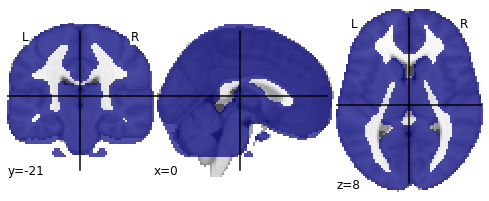

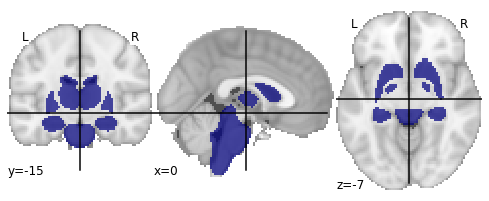

In [2]:
mask_img = "../data/reslicedER_grey25grey25.nii"
plotting.plot_roi(mask_img)

views = ["lateral", "medial", "dorsal", "ventral", "anterior", "posterior"]
big_fsaverage = datasets.fetch_surf_fsaverage('fsaverage')
low_fsaverage = datasets.fetch_surf_fsaverage('fsaverage5')

mask_subc_img = image.resample_to_img("/usr/local/fsl/data/standard/MNI152_T1_1mm_subbr_mask.nii.gz", 
                                      mask_img, interpolation="nearest")
plotting.plot_roi(mask_subc_img)

In [3]:
from scipy.io import loadmat
td_database = loadmat("../data/TDdatabase.mat", simplify_cells=True)['wholeMaskMNIAll']
regions_to_explore = list(td_database.keys())[19:74]

def get_region_name_from_coord(coords):
    """
    
    Function to extract the region name from 
    a given set of coordinates
    
    """
    coords = list(coords)
    label = "Unknown"
    for reg_label in regions_to_explore:
        reg_coords = td_database[reg_label]
        if coords in reg_coords.tolist():
            label = reg_label
    
    return label

def create_table_from_peaks(cluster_regions, peaks):
    
    """
    Function to create the table of activations
    
    """
    
    hemispheres = []
    region_names = []
    x_coords = []
    y_coords = []
    z_coords = []
    voxels = []
    max_t_stats = []
    
    for ii in np.argsort(peaks)[::-1]:
    
        cluster_img = image.index_img(cluster_regions, ii)

        a,b,c = np.argwhere(cluster_img.get_fdata()==np.max(cluster_img.get_fdata())).flatten()
        coords_cluster = coord_transform(a,b, c, affine=cluster_img.affine)
        
        x_coords.append(coords_cluster[0])
        y_coords.append(coords_cluster[1])
        z_coords.append(coords_cluster[2])
        
        if coords_cluster[0] > 0:
            hemispheres.append("R")
        else:
            hemispheres.append("L")
        
        reg_name = get_region_name_from_coord(coords_cluster)
        region_names.append(reg_name)
        
        n_voxels = (cluster_img.get_fdata()!=0).sum()
        voxels.append(n_voxels)
        
        t_max = cluster_img.get_fdata().max()
        max_t_stats.append(np.round(t_max, 2))
    
    activation_dict = {'Hemisphere': hemispheres, 
                       'Region': region_names,
                       'x': x_coords,
                       'y': y_coords,
                       'z': z_coords,
                       'Voxels': voxels,
                       'Peak (weight)': max_t_stats}
    
    activation_info_df = pd.DataFrame(activation_dict)
    # Convert coordinates to integers
    activation_info_df.x = activation_info_df.x.astype(int)
    activation_info_df.y = activation_info_df.y.astype(int)
    activation_info_df.z = activation_info_df.z.astype(int)
    
    return activation_info_df

# CASE 1: Look Negative vs Look Neutral -> chg_LNeg_LNur 

In [8]:
w_enc_1_img = load_img("../images/LookNeg_LookNeut_diff_ratings_weights_encoding.nii.gz")
w_enc_1_img_thr = load_img("../images/LookNeg_LookNeut_diff_ratings_weights_thr_p05_k50_encoding.nii.gz")

output_dir_1 = Path("../plots/weight_maps/lookNeg_vs_lookNeut/chg_lneg_lneu")
output_dir_1.mkdir(exist_ok=True, parents=True)
output_dir_1 = output_dir_1.absolute().as_posix()

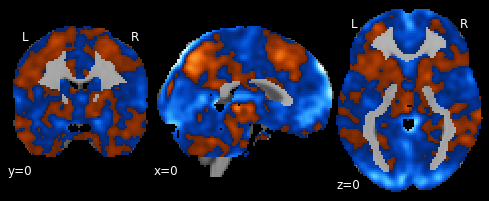

In [9]:
fig = plotting.plot_stat_map(w_enc_1_img,
                             cmap=plotting.cm.cyan_orange,
                             cut_coords=(0,0,0),
                             colorbar=False,
                             annotate=True,
                             draw_cross=False,
                             black_bg=True)
fig.savefig(opj(output_dir_1, "midsagittal_cuts_unthr_black.png"), dpi=300)
fig.savefig(opj(output_dir_1, "midsagittal_cuts_unthr_black.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "midsagittal_cuts_unthr_black.svg"), dpi=300)

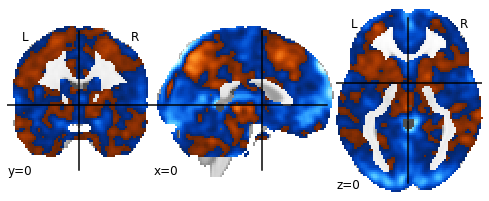

In [6]:
fig = plotting.plot_stat_map(w_enc_1_img,
                             cmap=plotting.cm.cyan_orange,
                             cut_coords=(0,0,0),
                             colorbar=False,
                             annotate=True)
fig.savefig(opj(output_dir_1, "midsagittal_cuts_unthr.png"), dpi=300)
fig.savefig(opj(output_dir_1, "midsagittal_cuts_unthr.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "midsagittal_cuts_unthr.svg"), dpi=300)

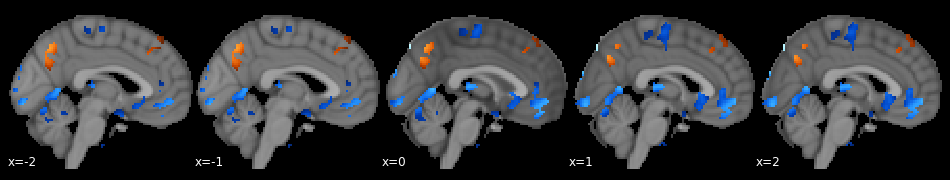

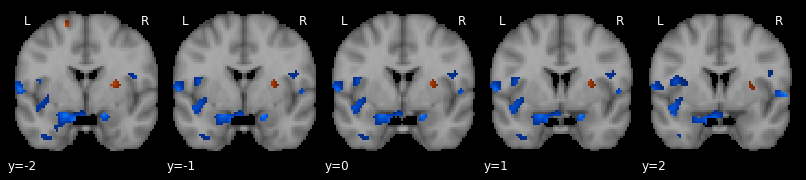

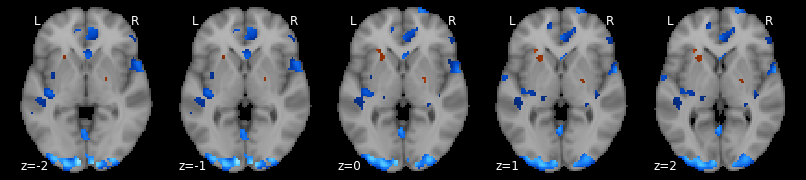

In [8]:
fig = plotting.plot_stat_map(w_enc_1_img_thr,
                             cmap=plotting.cm.cyan_orange,
                             display_mode='x',
                             cut_coords=[-2,-1, 0, 1, 2],
                             colorbar=False,
                             annotate=True,
                             black_bg=True)
fig.savefig(opj(output_dir_1, "saggital_cuts_thr_boot5000_k50_black.png"), dpi=300)
fig.savefig(opj(output_dir_1, "saggital_cuts_thr_boot5000_k50_black.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "saggital_cuts_thr_boot5000_k50_black.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_1_img_thr,
                             cmap=plotting.cm.cyan_orange,
                             display_mode='y',
                             cut_coords=[-2,-1, 0, 1, 2],
                             colorbar=False,
                             annotate=True,
                             black_bg=True)
fig.savefig(opj(output_dir_1, "coronal_cuts_thr_boot5000_k50_black.png"), dpi=300)
fig.savefig(opj(output_dir_1, "coronal_cuts_thr_boot5000_k50_black.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "coronal_cuts_thr_boot5000_k50_black.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_1_img_thr,
                             cmap=plotting.cm.cyan_orange,
                             display_mode='z',
                             cut_coords=[-2,-1, 0, 1, 2],
                             colorbar=False,
                             annotate=True,
                             black_bg=True)
fig.savefig(opj(output_dir_1, "axial_cuts_thr_boot5000_k50_black.png"), dpi=300)
fig.savefig(opj(output_dir_1, "axial_cuts_thr_boot5000_k50_black.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "axial_cuts_thr_boot5000_k50_black.svg"), dpi=300)

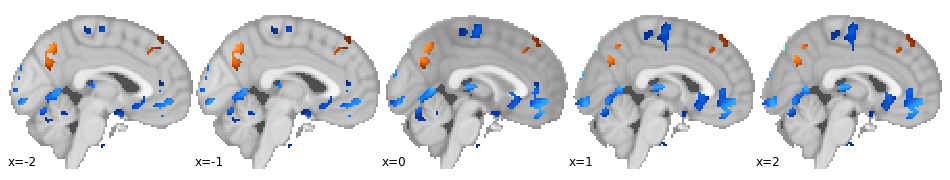

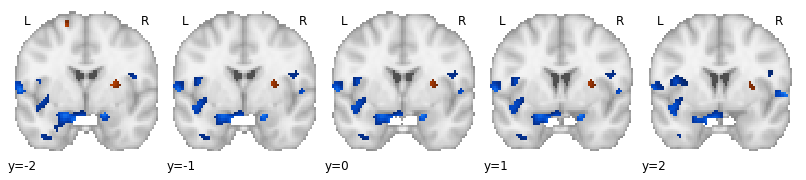

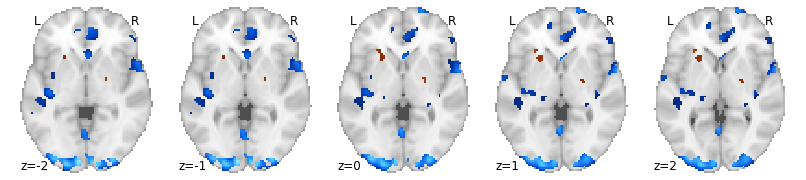

In [8]:
fig = plotting.plot_stat_map(w_enc_1_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='x',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_1, "saggital_cuts_thr_boot5000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_1, "saggital_cuts_thr_boot5000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "saggital_cuts_thr_boot5000_k50.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_1_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='y',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_1, "coronal_cuts_thr_boot5000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_1, "coronal_cuts_thr_boot5000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "coronal_cuts_thr_boot5000_k50.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_1_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='z',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_1, "axial_cuts_thr_boot5000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_1, "axial_cuts_thr_boot5000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "axial_cuts_thr_boot5000_k50.svg"), dpi=300)

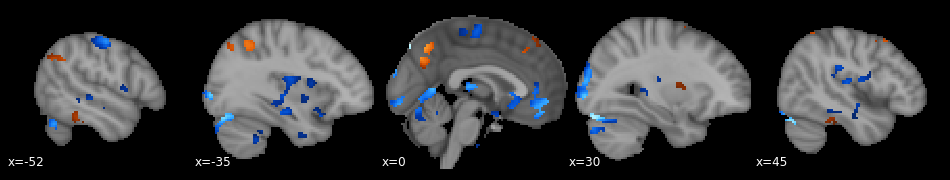

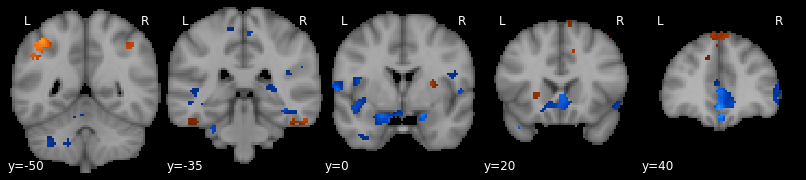

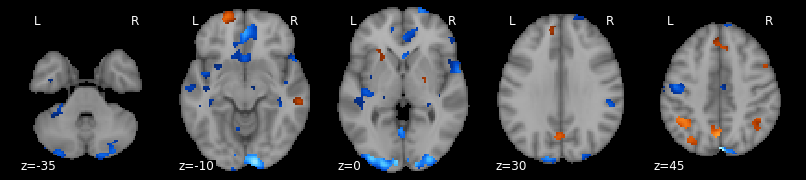

In [9]:
fig = plotting.plot_stat_map(w_enc_1_img_thr,
                             cmap=plotting.cm.cyan_orange,
                             display_mode='x',
                             cut_coords=[-52, -35, 0, 30, 45],
                             colorbar=False,
                             annotate=True,
                             black_bg=True)
fig.savefig(opj(output_dir_1, "saggital_spread_cuts_thr_boot5000_k50_black.png"), dpi=300)
fig.savefig(opj(output_dir_1, "saggital_spread_cuts_thr_boot5000_k50_black.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "saggital_spread_cuts_thr_boot5000_k50_black.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_1_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='y',
                       cut_coords=[-50, -35, 0, 20, 40],
                       colorbar=False,
                       annotate=True,
                             black_bg=True)
fig.savefig(opj(output_dir_1, "coronal_spread_cuts_thr_boot5000_k50_black.png"), dpi=300)
fig.savefig(opj(output_dir_1, "coronal_spread_cuts_thr_boot5000_k50_black.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "coronal_spread_cuts_thr_boot5000_k50_black.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_1_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='z',
                       cut_coords=[-35, -10, 0, 30, 45],
                       colorbar=False,
                       annotate=True,
                             black_bg=True)
fig.savefig(opj(output_dir_1, "axial_spread_cuts_thr_boot5000_k50_black.png"), dpi=300)
fig.savefig(opj(output_dir_1, "axial_spread_cuts_thr_boot5000_k50_black.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "axial_spread_cuts_thr_boot5000_k50_black.svg"), dpi=300)

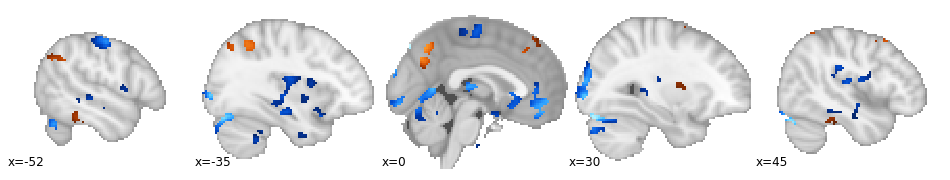

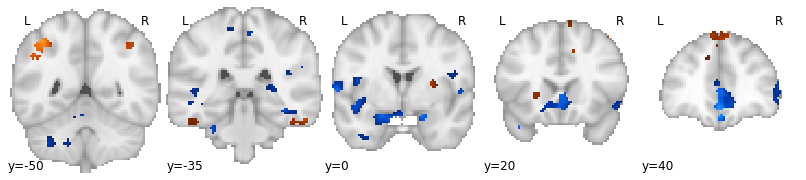

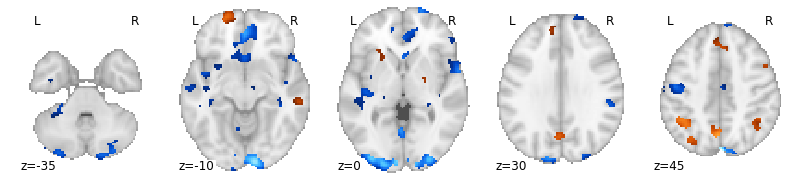

In [9]:
fig = plotting.plot_stat_map(w_enc_1_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='x',
                       cut_coords=[-52, -35, 0, 30, 45],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_1, "saggital_spread_cuts_thr_boot5000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_1, "saggital_spread_cuts_thr_boot5000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "saggital_spread_cuts_thr_boot5000_k50.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_1_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='y',
                       cut_coords=[-50, -35, 0, 20, 40],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_1, "coronal_spread_cuts_thr_boot5000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_1, "coronal_spread_cuts_thr_boot5000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "coronal_spread_cuts_thr_boot5000_k50.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_1_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='z',
                       cut_coords=[-35, -10, 0, 30, 45],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_1, "axial_spread_cuts_thr_boot5000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_1, "axial_spread_cuts_thr_boot5000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "axial_spread_cuts_thr_boot5000_k50.svg"), dpi=300)

In [11]:
# Save surface plots (pngs, in high resolution)
for hemi in ['left', 'right']:
    if hemi=="left":
        big_texture = surf_plotting.vol_to_surf(w_enc_1_img_thr, big_fsaverage.pial_left, 
                                               interpolation='nearest', radius=0.0, n_samples=1)
        surf_mesh = big_fsaverage.infl_left
        bg_map = big_fsaverage.sulc_left
    else:
        big_texture = surf_plotting.vol_to_surf(w_enc_1_img_thr, big_fsaverage.pial_right,
                                               interpolation='nearest', radius=0.0, n_samples=1)
        surf_mesh = big_fsaverage.infl_right
        bg_map = big_fsaverage.sulc_right
    
    for view in views:
        filename = "stat_surface_" + "hemi_%s" % hemi + "_view_%s" % view + "_boot_k_50.png"
        output_file = output_dir_1 + "/" + filename
        fig = plt.figure(figsize=(10,10))
        plotting.plot_surf_stat_map(surf_mesh,
                                    big_texture, hemi=hemi, colorbar=False, view=view,
                                    cmap=plotting.cm.cyan_orange,
                                    threshold=1e-6, bg_map=bg_map, 
                                    figure=fig, output_file=output_file)

In [37]:
connected_regions_0001_img, index_regions_0001 = connected_regions(w_enc_1_img_thr, 
                                                                   min_region_size=0,
                                                                   smoothing_fwhm=None, 
                                                                   extract_type='connected_components')

# The peaks
positive_regions_0001_img, positive_peaks_0001 = [],[]
negative_regions_0001_img, negative_peaks_0001 = [],[]
for ii in range(len(index_regions_0001)):
    img = image.index_img(connected_regions_0001_img, ii)
    data = img.get_fdata()
    vmin = np.min(data)
    vmax = np.max(data)
    
    if abs(vmax) >  abs(vmin):
        positive_regions_0001_img.append(img)
        positive_peaks_0001.append(vmax)
    else:
        negative_regions_0001_img.append(image.math_img("-1*img1", img1=img))
        negative_peaks_0001.append(abs(vmin))
        
positive_regions_0001_img = image.concat_imgs(positive_regions_0001_img)
negative_regions_0001_img = image.concat_imgs(negative_regions_0001_img)

In [13]:
print(negative_regions_0001_img.shape[3] + positive_regions_0001_img.shape[3])
print(len(positive_peaks_0001) + len(negative_peaks_0001))

53
53


In [42]:
pos_info_0001_df = create_table_from_peaks(positive_regions_0001_img, positive_peaks_0001)
pos_info_0001_df.to_excel("../results/prediction/chg_LNeg_LNur/look_neg_look_neut/positive_clusters_boot5000_k50.xlsx",
                         index=False)
pos_info_0001_df

,Hemisphere,Region,x,y,z,Voxels,Peak (weight)
0,R,Inferior_Parietal_Lobule,38,-56,58,63,6.02
1,L,Precuneus,-2,-66,46,223,5.86
2,L,Inferior_Parietal_Lobule,-40,-50,50,236,5.74
3,L,Superior_Frontal_Gyrus,-20,62,-8,132,4.51
4,R,Middle_Frontal_Gyrus,44,16,52,57,3.74
5,R,Inferior_Parietal_Lobule,44,-48,48,79,3.62
6,L,Superior_Parietal_Lobule,-30,-68,46,128,3.61
7,R,Middle_Frontal_Gyrus,24,8,64,50,3.50
8,L,Medial_Frontal_Gyrus,-4,30,40,166,3.48
9,L,Sub_Gyral,-22,-10,58,99,3.16


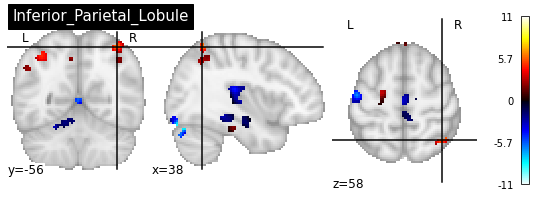

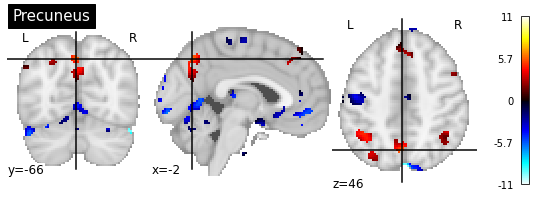

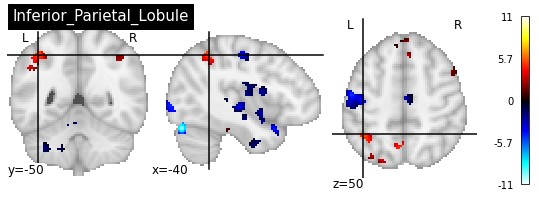

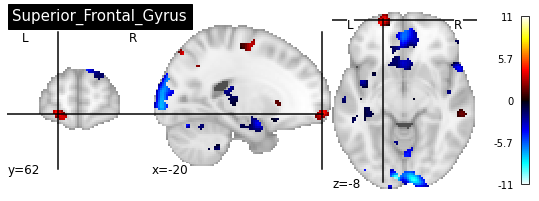

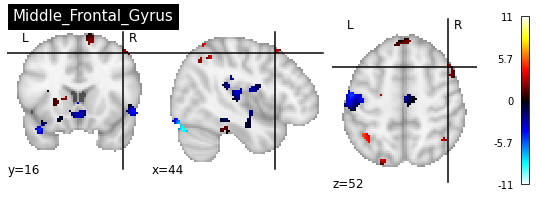

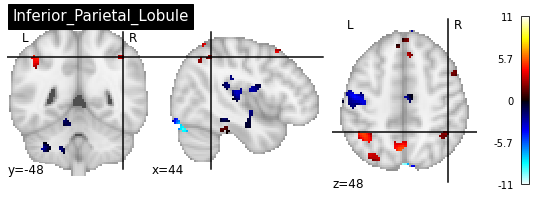

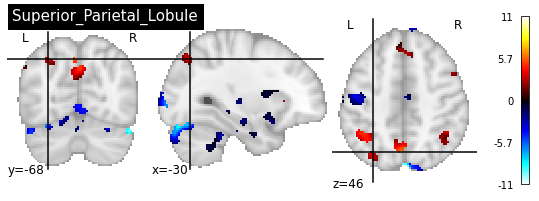

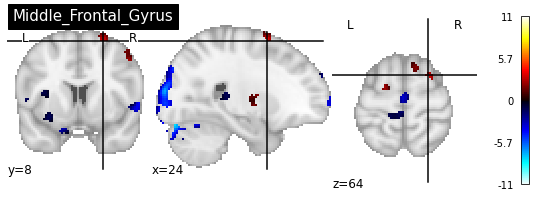

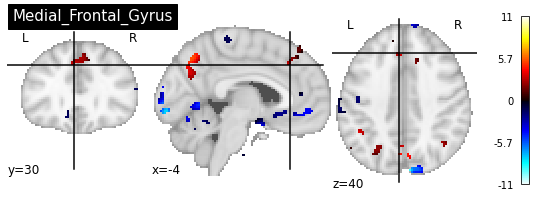

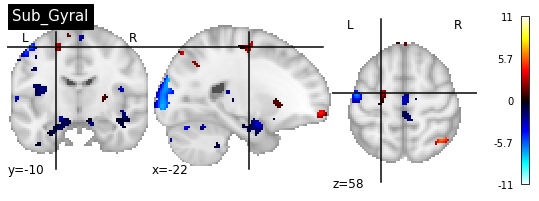

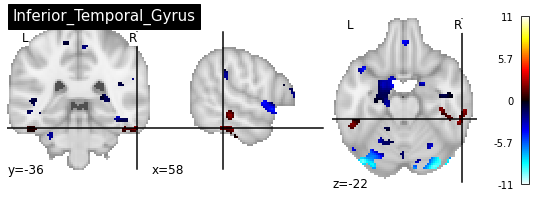

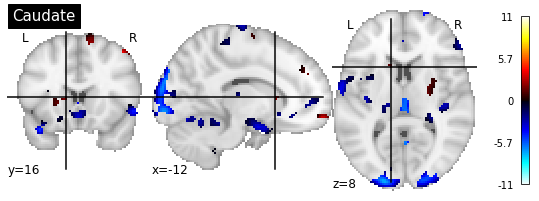

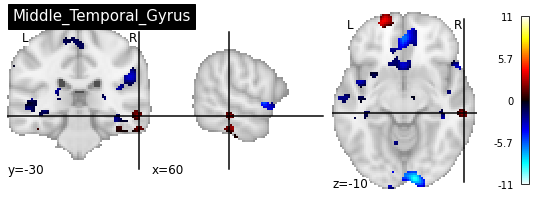

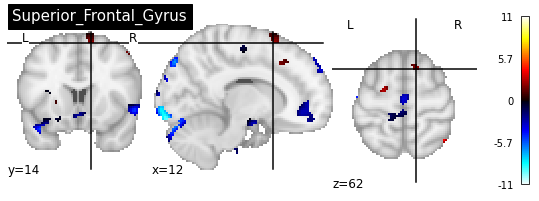

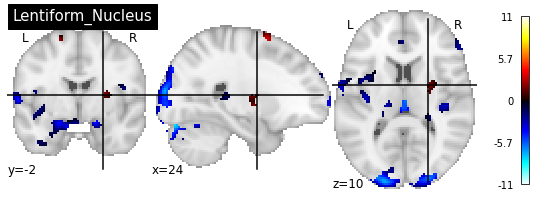

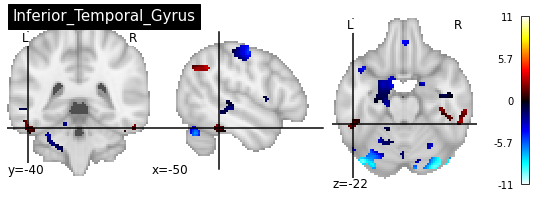

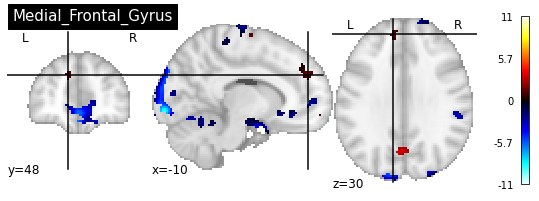

In [15]:
for ii in range(pos_info_0001_df.shape[0]):
    coords = pos_info_0001_df.loc[ii, ['x','y','z'] ].to_numpy()
    reg = pos_info_0001_df.loc[ii, "Region" ]
    plotting.plot_stat_map(w_enc_1_img_thr, cut_coords=coords, title=reg)

In [43]:
neg_info_0001_df = create_table_from_peaks(negative_regions_0001_img, negative_peaks_0001)
neg_info_0001_df.iloc[:, 6] = -neg_info_0001_df.iloc[:, 6] # Display peaks in negative
neg_info_0001_df.to_excel("../results/prediction/chg_LNeg_LNur/look_neg_look_neut/negative_clusters_boot5000_k50.xlsx",
                          index=False)
neg_info_0001_df

,Hemisphere,Region,x,y,z,Voxels,Peak (weight)
0,R,Unknown,4,-84,42,117,-11.32
1,L,Lingual_Gyrus,-8,-94,-6,2229,-10.88
2,L,Declive,-40,-78,-24,639,-10.10
3,R,Declive,52,-66,-26,520,-9.79
4,L,Unknown,0,-58,6,145,-6.65
5,L,Precentral_Gyrus,-46,-12,58,394,-6.41
6,R,Unknown,2,52,-6,604,-6.33
7,R,Extra_Nuclear,2,-26,8,60,-6.00
8,R,Unknown,6,60,36,92,-5.84
9,R,Superior_Temporal_Gyrus,60,4,2,205,-5.41


/home/javi/Documentos/software/nilearn/nilearn/plotting/displays.py:666: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figure, figsize=figsize,


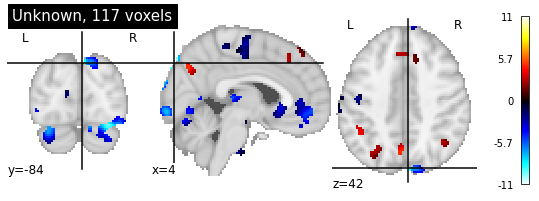

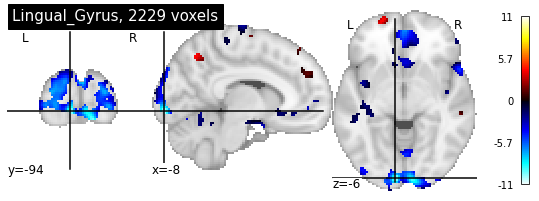

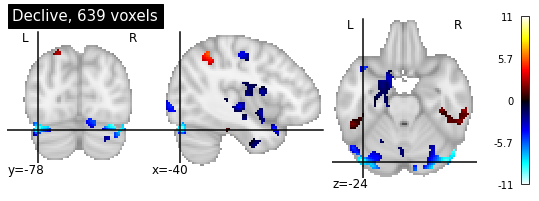

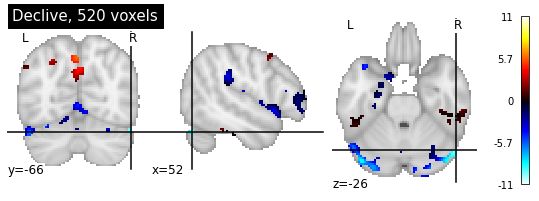

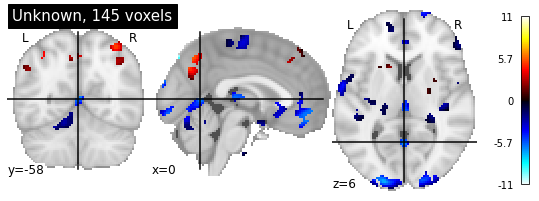

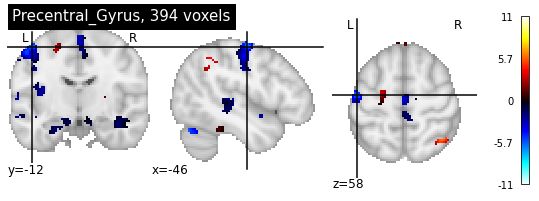

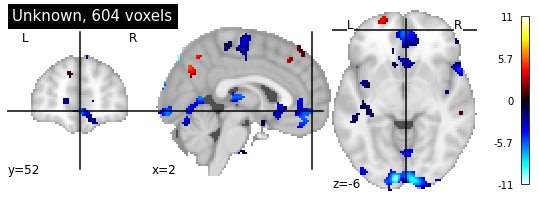

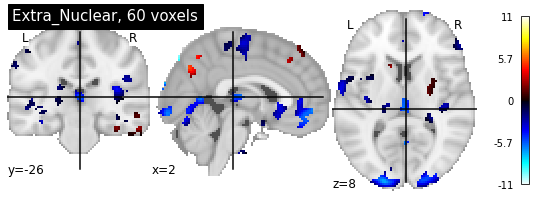

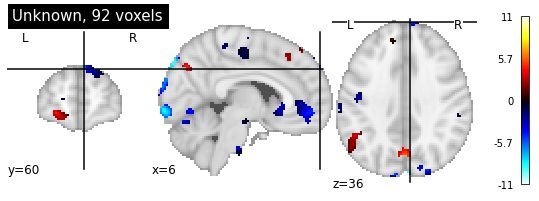

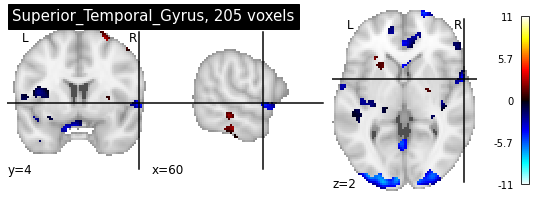

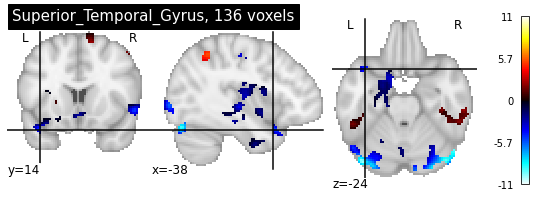

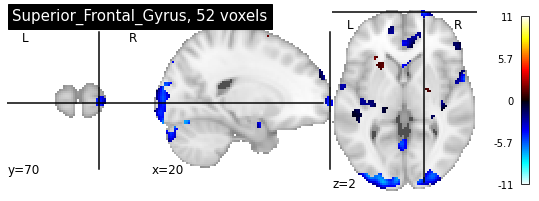

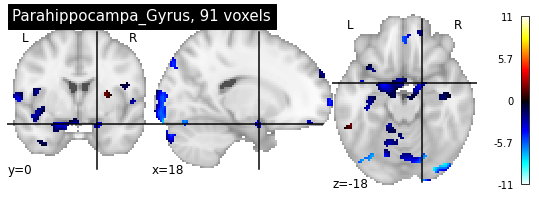

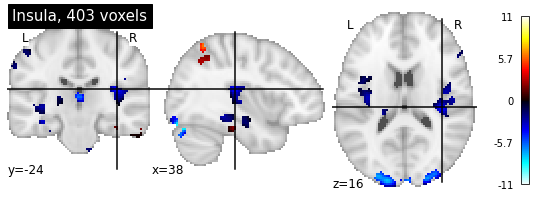

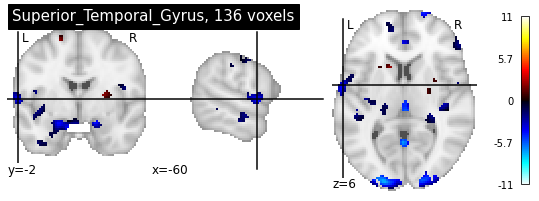

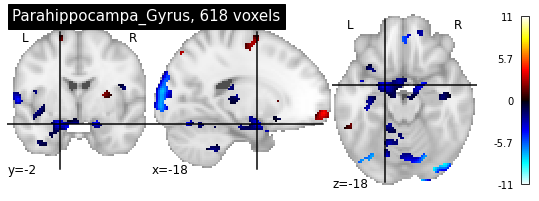

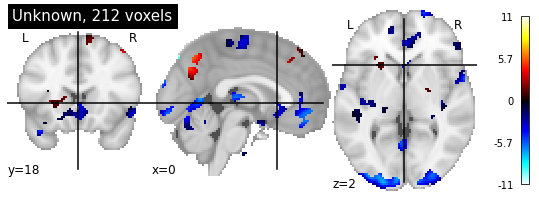

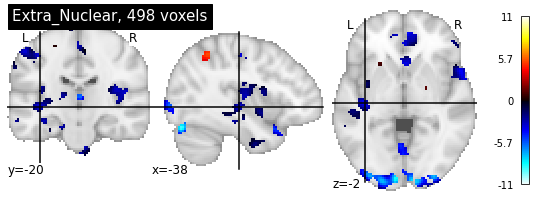

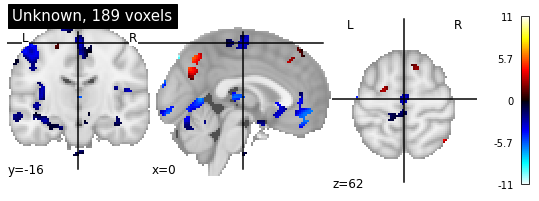

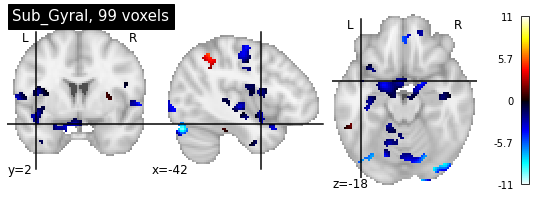

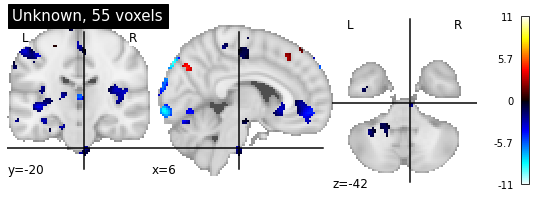

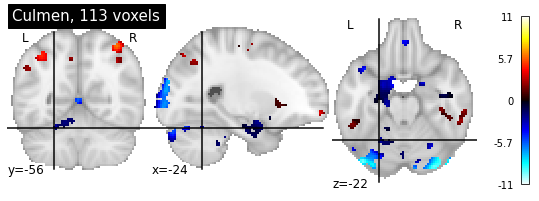

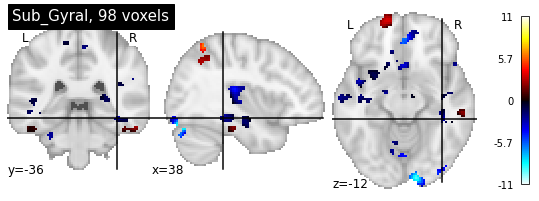

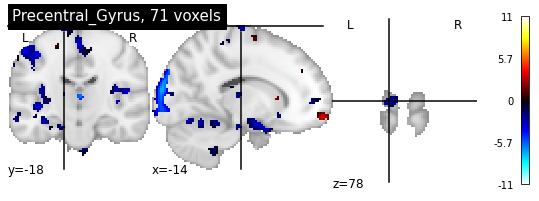

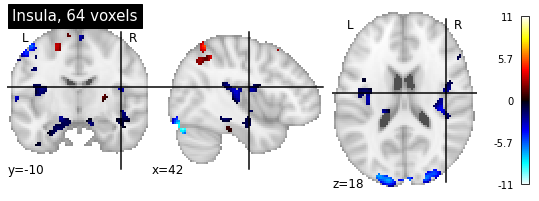

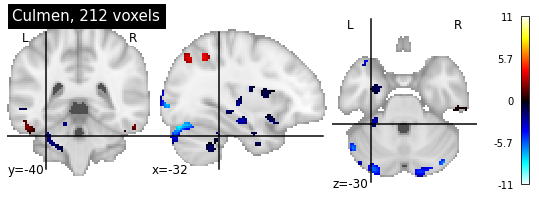

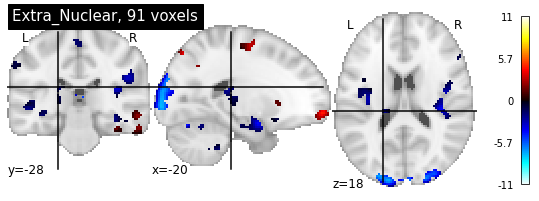

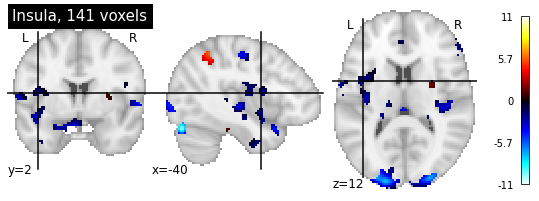

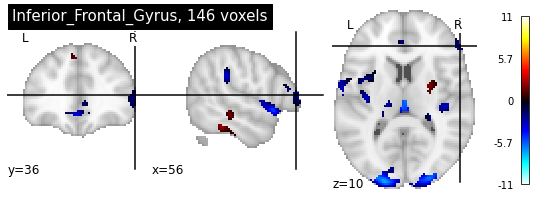

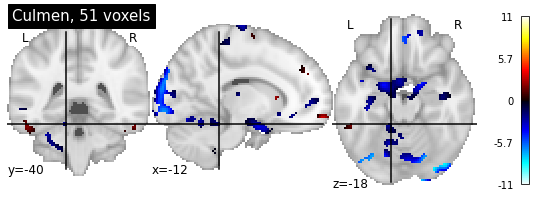

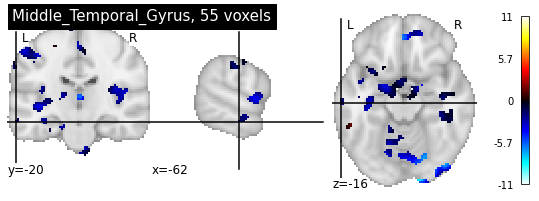

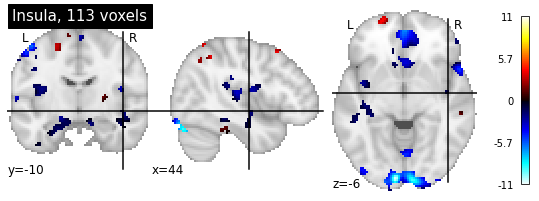

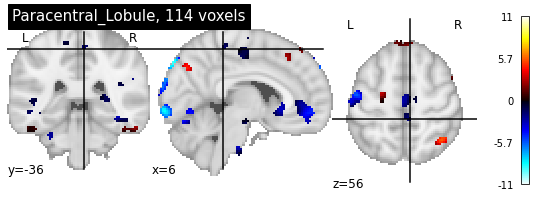

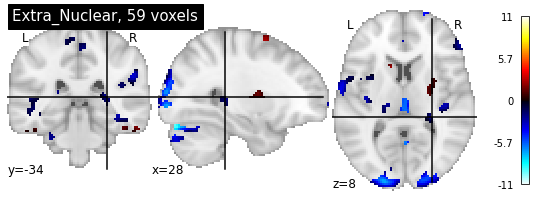

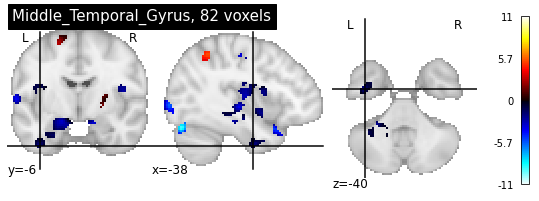

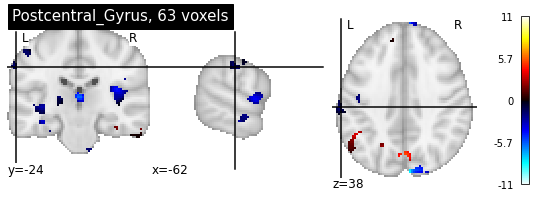

In [18]:
for ii in range(neg_info_0001_df.shape[0]):
    coords = neg_info_0001_df.loc[ii, ['x','y','z'] ].to_numpy()
    reg = neg_info_0001_df.loc[ii, "Region"]
    n_voxels = neg_info_0001_df.loc[ii, "Voxels"]
    plotting.plot_stat_map(w_enc_1_img_thr, cut_coords=coords, title="%s, %d voxels"%(reg, n_voxels))

In [19]:
# check that we have the same number of voxels of the orignal image
print(np.sum(abs(w_enc_1_img_thr.get_fdata())>0))
print(pos_info_0001_df.Voxels.sum()  + neg_info_0001_df.Voxels.sum())

10775
10775


# REGULATE NEGATIVE vs LOOK NEGATIVE

In [10]:
w_enc_2_img = load_img("../images/RegNeg_LookNeg_diff_ratings_weights_encoding.nii.gz")
w_enc_2_img_thr = load_img("../images/RegNeg_LookNeg_diff_ratings_weights_thr_p05_k50_encoding.nii.gz")

output_dir_2 = Path("../plots/weight_maps/regNeg_vs_lookNeg/chg_rneg_lneg")
output_dir_2.mkdir(exist_ok=True, parents=True)
output_dir_2 = output_dir_2.absolute().as_posix()

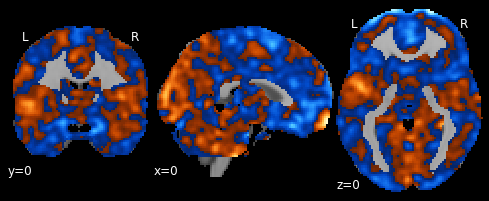

In [11]:
fig = plotting.plot_stat_map(w_enc_2_img,
                             cmap=plotting.cm.cyan_orange,
                             cut_coords=(0,0,0),
                             colorbar=False,
                             annotate=True,
                             draw_cross=False,
                             black_bg=True)
fig.savefig(opj(output_dir_2, "midsagittal_cuts_unthr_black.png"), dpi=300)
fig.savefig(opj(output_dir_2, "midsagittal_cuts_unthr_black.pdf"), dpi=300)
fig.savefig(opj(output_dir_2, "midsagittal_cuts_unthr_black.svg"), dpi=300)

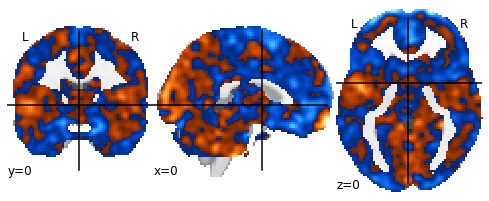

In [21]:
fig = plotting.plot_stat_map(w_enc_2_img,
                             cmap=plotting.cm.cyan_orange,
                             cut_coords=(0,0,0),
                             colorbar=False,
                             annotate=True)
fig.savefig(opj(output_dir_2, "midsagittal_cuts_unthr.png"), dpi=300)
fig.savefig(opj(output_dir_2, "midsagittal_cuts_unthr.pdf"), dpi=300)
fig.savefig(opj(output_dir_2, "midsagittal_cuts_unthr.svg"), dpi=300)

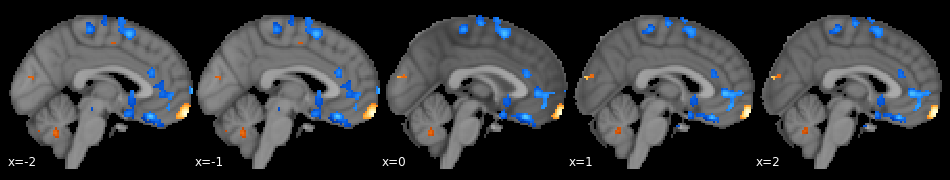

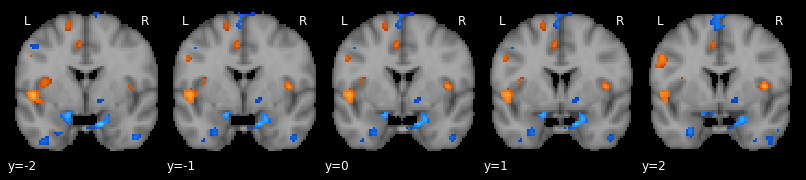

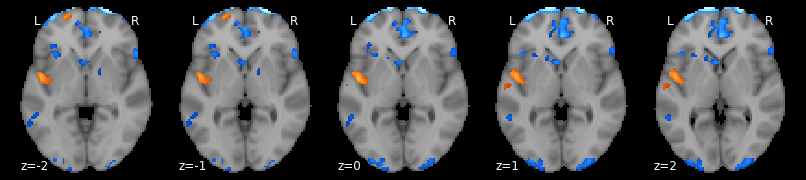

In [6]:
fig = plotting.plot_stat_map(w_enc_2_img_thr,
                             cmap=plotting.cm.cyan_orange,
                             display_mode='x',
                             cut_coords=[-2,-1, 0, 1, 2],
                             colorbar=False,
                             annotate=True,
                             black_bg=True)
fig.savefig(opj(output_dir_2, "saggital_cuts_thr_boot5000_k50_black.png"), dpi=300)
fig.savefig(opj(output_dir_2, "saggital_cuts_thr_boot5000_k50_black.pdf"), dpi=300)
fig.savefig(opj(output_dir_2, "saggital_cuts_thr_boot5000_k50_black.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_2_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='y',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True,
                             black_bg=True)
fig.savefig(opj(output_dir_2, "coronal_cuts_thr_boot5000_k50_black.png"), dpi=300)
fig.savefig(opj(output_dir_2, "coronal_cuts_thr_boot5000_k50_black.pdf"), dpi=300)
fig.savefig(opj(output_dir_2, "coronal_cuts_thr_boot5000_k50_black.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_2_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='z',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True,
                             black_bg=True)
fig.savefig(opj(output_dir_2, "axial_cuts_thr_boot5000_k50_black.png"), dpi=300)
fig.savefig(opj(output_dir_2, "axial_cuts_thr_boot5000_k50_black.pdf"), dpi=300)
fig.savefig(opj(output_dir_2, "axial_cuts_thr_boot5000_k50_black.svg"), dpi=300)

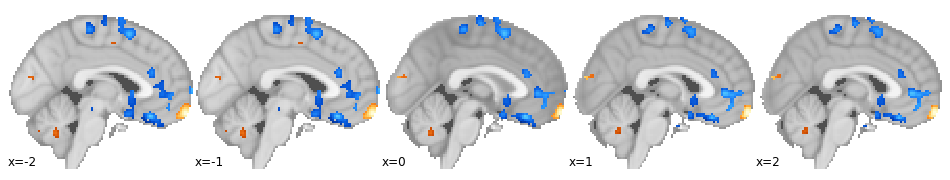

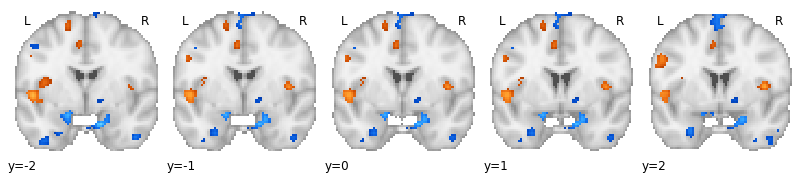

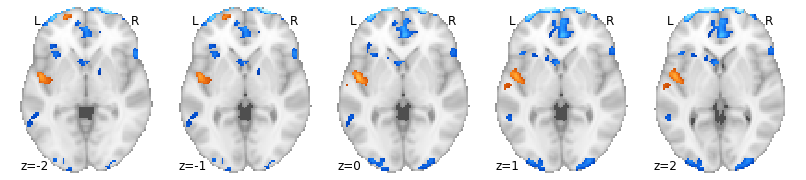

In [22]:
fig = plotting.plot_stat_map(w_enc_2_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='x',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_2, "saggital_cuts_thr_boot5000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_2, "saggital_cuts_thr_boot5000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_2, "saggital_cuts_thr_boot5000_k50.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_2_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='y',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_2, "coronal_cuts_thr_boot5000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_2, "coronal_cuts_thr_boot5000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_2, "coronal_cuts_thr_boot5000_k50.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_2_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='z',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_2, "axial_cuts_thr_boot5000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_2, "axial_cuts_thr_boot5000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_2, "axial_cuts_thr_boot5000_k50.svg"), dpi=300)

In [24]:
# Save surface plots (pngs, in high resolution)
for hemi in ['left', 'right']:
    if hemi=="left":
        big_texture = surf_plotting.vol_to_surf(w_enc_2_img_thr, big_fsaverage.pial_left,
                                               interpolation='nearest', radius=0., n_samples=1)
        surf_mesh = big_fsaverage.infl_left
        bg_map = big_fsaverage.sulc_left
    else:
        big_texture = surf_plotting.vol_to_surf(w_enc_2_img_thr, big_fsaverage.pial_right,
                                               interpolation='nearest', radius=0., n_samples=1)
        surf_mesh = big_fsaverage.infl_right
        bg_map = big_fsaverage.sulc_right
    
    for view in views:
        filename = "stat_surface_" + "hemi_%s" % hemi + "_view_%s" % view + "_boot_k_50.png"
        output_file = output_dir_2 + "/" + filename
        fig = plt.figure(figsize=(10,10))
        plotting.plot_surf_stat_map(surf_mesh,
                                    big_texture, hemi=hemi, colorbar=False, view=view,
                                    cmap=plotting.cm.cyan_orange,
                                    threshold=1e-6, bg_map=bg_map, 
                                    figure=fig, output_file=output_file)

In [45]:
connected_regions_0002_img, index_regions_0002 = connected_regions(w_enc_2_img_thr,
                                                                   min_region_size=0,
                                                                   smoothing_fwhm=None, 
                                                                   extract_type='connected_components')

# The peaks
positive_regions_0002_img, positive_peaks_0002 = [],[]
negative_regions_0002_img, negative_peaks_0002 = [],[]
for ii in range(len(index_regions_0002)):
    img = image.index_img(connected_regions_0002_img, ii)
    data = img.get_fdata()
    vmin = np.min(data)
    vmax = np.max(data)
    
    if abs(vmax) >  abs(vmin):
        positive_regions_0002_img.append(img)
        positive_peaks_0002.append(vmax)
    else:
        negative_regions_0002_img.append(image.math_img("-1*img1", img1=img))
        negative_peaks_0002.append(abs(vmin))
        
positive_regions_0002_img = image.concat_imgs(positive_regions_0002_img)
negative_regions_0002_img = image.concat_imgs(negative_regions_0002_img)

In [46]:
print(negative_regions_0002_img.shape[3] + positive_regions_0002_img.shape[3])
print(len(positive_peaks_0002) + len(negative_peaks_0002))

57
57


In [47]:
pos_info_0002_df = create_table_from_peaks(positive_regions_0002_img, positive_peaks_0002)
pos_info_0002_df.to_excel("../results/prediction/chg_RNeg_LNeg/reg_neg_look_neg/positive_clusters_boot5000_k50.xlsx",
                         index=False)
pos_info_0002_df

,Hemisphere,Region,x,y,z,Voxels,Peak (weight)
0,R,Medial_Frontal_Gyrus,4,64,-18,421,18.64
1,L,Postcentral_Gyrus,-42,-22,60,980,15.32
2,L,Lingual_Gyrus,-14,-92,-20,104,13.08
3,R,Cuneus,2,-92,18,57,12.49
4,L,Superior_Temporal_Gyrus,-62,-16,8,226,11.24
5,L,Superior_Temporal_Gyrus,-48,-4,0,384,11.16
6,R,Transverse_Temporal_Gyrus,56,-14,12,283,10.32
7,R,Insula,42,2,8,54,10.17
8,R,Middle_Frontal_Gyrus,44,46,14,101,9.93
9,R,Superior_Frontal_Gyrus,18,42,50,81,9.80


In [48]:
neg_info_0002_df = create_table_from_peaks(negative_regions_0002_img, negative_peaks_0002)
neg_info_0002_df.iloc[:, 6] = -neg_info_0002_df.iloc[:, 6] # Display peaks in negative
neg_info_0002_df.to_excel("../results/prediction/chg_RNeg_LNeg/reg_neg_look_neg/negative_clusters_boot5000_k50.xlsx",
                         index=False)
neg_info_0002_df

,Hemisphere,Region,x,y,z,Voxels,Peak (weight)
0,R,Unknown,22,70,-2,320,-17.97
1,L,Unknown,-10,72,4,359,-17.51
2,L,Unknown,-16,-20,-22,115,-12.80
3,R,Middle_Frontal_Gyrus,34,64,6,52,-12.48
4,R,Uncus,14,-2,-26,154,-12.42
5,L,Medial_Frontal_Gyrus,-2,30,-20,1120,-12.09
6,L,Unknown,0,10,60,313,-11.58
7,L,Parahippocampa_Gyrus,-16,-2,-18,81,-10.56
8,L,Declive,-42,-76,-26,135,-10.54
9,R,Declive,44,-70,-26,54,-10.52


In [49]:
print(np.sum(abs(w_enc_2_img_thr.get_fdata())>0))
print(pos_info_0002_df.Voxels.sum()  + neg_info_0002_df.Voxels.sum())

10236
10236
